In [1]:
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

### Task 1: (30% of credit)
#### (1) Consder the dataset 1 below, with two-dimensional observations X classified into 2 categories using vector Y. As you can see from the plot the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are admitted). 
#### a. Report the separating hyperplane (line).
#### b. Calculate the margin.
#### c. List the support vectors.

#### (2) Add the separating line to the plot, visualize the margin and mark the support vectors.

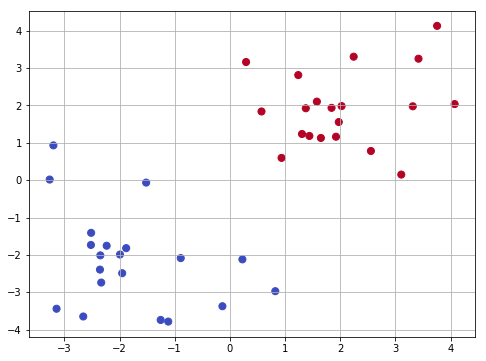

In [2]:
#Data
data1=pd.read_csv('dataset1.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
rcParams['figure.figsize'] = 8, 6
plt.grid()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

#### Solution:

1.
(a).

In [3]:
from sklearn import svm
# fit the model
clf = svm.SVC(kernel='linear',C=100000)  # as we use linear svm we specify a linear kernel (see below what does it mean)
_ =clf.fit(X, Y)

In [4]:
w = clf.coef_[0]
b = clf.intercept_[0]
x1 = np.linspace(-2.5, 2.5)
x2 = (-(w[0]) * x1 - b )/ w[1]
x_up= (-(w[0]) * x1 - b+1 )/ w[1]
x_down =  (-(w[0]) * x1 - (clf.intercept_[0]) -1)/ w[1]


In [5]:
print("The hyperplane is x1 * {w1:.2f} + x2 * {w2:.2f} + {b:.2f}= 0".format(w1 = w[0],w2 = w[1],b = b))

The hyperplane is x1 * 0.66 + x2 * 0.56 + 0.04= 0


(b).

In [6]:
print("Margin equals to {m:.4f}".format(m = 2/(np.sqrt(np.sum(w**2) ))))

Margin equals to 2.2978


(c).

In [7]:
print("There are three support vectors, and they are: \n {} .".format(clf.support_vectors_))

There are three support vectors, and they are: 
 [[ 0.22627536 -2.11810965]
 [-1.5180363  -0.06399383]
 [ 0.93564585  0.5969359 ]] .


In [8]:
print("The upper support vector is x1 * {w1:.2f} + x2 * {w2:.2f} + {b:.2f}= 1".format(w1 = w[0],w2 = w[1],b = b))

The upper support vector is x1 * 0.66 + x2 * 0.56 + 0.04= 1


In [9]:
print("The down support vector is x1 * {w1:.2f} + x2 * {w2:.2f} + {b:.2f}= -1".format(w1 = w[0],w2 = w[1],b = b))

The down support vector is x1 * 0.66 + x2 * 0.56 + 0.04= -1


2.Plot

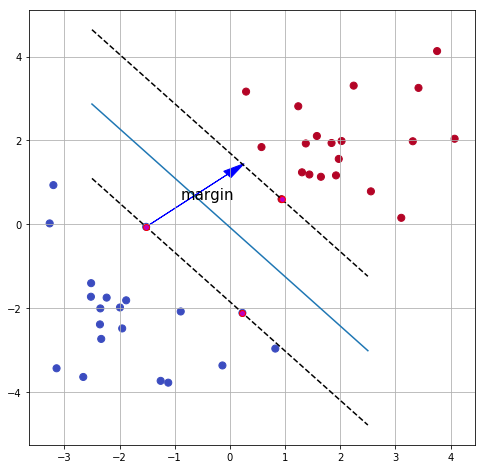

In [10]:
#calculate the vector that is perpendicular to the dividers
x =w[0]/(w[0]**2+w[1]**2)
y =w[1]/(w[0]**2+w[1]**2)
rcParams['figure.figsize'] = 8, 8
plt.grid()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));
plt.plot(x1,x2)
plt.plot(x1,x_up,'k--')
_ = plt.plot(x1,x_down,'k--')
plt.arrow(clf.support_vectors_[1][0], clf.support_vectors_[1][1], 1.68*x,1.68*y, fc="b", ec="b", head_width=0.2, head_length=0.4)

plt.annotate("margin", xy=(-0.9, 0.6), fontsize=15)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],facecolors='m',edgecolors='r', zorder=40)


plt.show()

### Task 2 (30% of credit)

#### (1)Train SVM with soft margin on the training subset of the dataset 2 below. First try C=0.01, and visualize the seperation over the training set. Report the in-sample and out-of-sample accuracy acheived by SVM over the training and test sets.

#### (2) Try various regulatization constants C from the sequence below and use the validation subset in order to evaluate perfomance of the classifier. Plot the validation accuracy vs log(C).  
C=[math.exp(i) for i in np.linspace(-10,5,200)]   

#### (3) Select optimal C based on the validation accuracy above and report new out-of-sample accuracy of the classifier over the test set while using this optimal C.


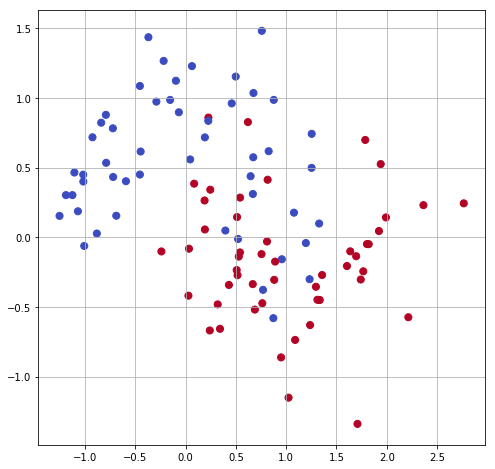

In [11]:
#Data
data2=pd.read_csv('dataset2.csv')
X=data2.iloc[:,:2]
Y=data2.iloc[:,2]
plt.grid()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

#Generate training(X_train, Y_train) and testing data(X_test,Y_test) sets from Data(X,Y) for out of sample test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=1)

#Generate validation(X_vali, Y_vali) and testing data(X_train_1,Y_train_1) sets from training data(X_train,Y_train)
#for training arguments
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(
    X_train, Y_train, test_size=0.33, random_state=99)

### Solutions:

(1)

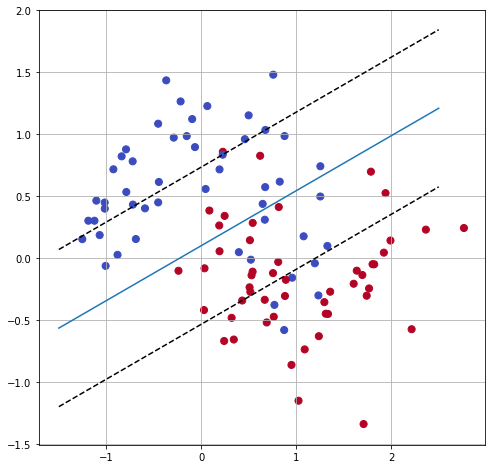

In [12]:
clf = svm.SVC(kernel='linear',C=1.1)
clf.fit(X_train,Y_train)
in_sample_score = clf.score(X_train_1,Y_train_1)
out_sample_score = clf.score(X_vali,Y_vali)

plt.grid()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))

w = clf.coef_[0]
b = clf.intercept_[0]
x1 = np.linspace(-1.5, 2.5)
x2 = (-(w[0]) * x1 - b )/ w[1]
x_up= (-(w[0]) * x1 - b+1 )/ w[1]
x_down =  (-(w[0]) * x1 - (clf.intercept_[0]) -1)/ w[1]
plt.plot(x1,x2)
plt.plot(x1,x_up,'k--')
_ = plt.plot(x1,x_down,'k--')

In [13]:
print("In-sample score is {a},while out-of sample score is {b}".format(a = in_sample_score, b =out_sample_score))

In-sample score is 0.5522388059701493,while out-of sample score is 0.3939393939393939


(2)

#### (For this question people could have different C. Any C that is bigger than 1, is a safe choice. But the corresponding accuracy should be around 0.78.) 

**I prefer to use `Cross validation` here and I think this is a better method to pick `C`**

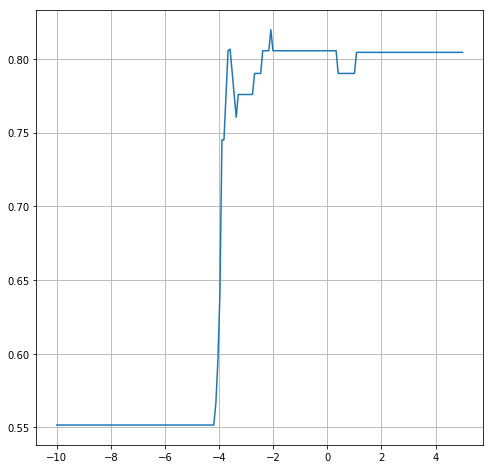

In [14]:
import math
from sklearn.model_selection import cross_val_score
score = []
C=np.array([math.exp(i) for i in np.linspace(-10,5,200)] )
for c in C:
    clf = svm.SVC(kernel='linear',C=c)
    score_temp = cross_val_score(clf, X_train, Y_train, cv=5, scoring="accuracy").mean()
    score.append(score_temp)
score = np.array(score)

_ = plt.plot(np.log(C),score)
_ = plt.grid()

(3)

#### (The answer could be different for people who have different optimal C. However it should be around 80 percent.)

In [15]:
clf = svm.SVC(kernel='linear',C=1.5)
clf.fit(X_train,Y_train)
in_sample_score = clf.score(X_train,Y_train)
out_sample_score = clf.score(X_test,Y_test)
print("In-sample score is {a},while out-of sample score is {b}".format(a = in_sample_score, b =out_sample_score))

In-sample score is 0.835820895522388,while out-of sample score is 0.8484848484848485


### Task 3 (40% of credit)

#### (1) Train polynomial SVM over the training subset of the dataset 3 provided below. Use the default arguments, and plot the seperation result. Report classification accuracy for the training and test sets.

#### (2) Use validation subset in order to pick the optimal parameters for the polynomial model.

(a) Try the degrees 1,2,3,4. For each degree, consider variety of regularization constants from the range

C=[math.exp(i) for i in np.linspace(-10,2*degree,200)]

in order to evaluate the classifier performance over the validation set.

(b) Plot graph "Accuracy vs log(C)" for each degree, and pick optimal degree and regularization constant C based on these graphs. Report your optimal degree and C.

(c) Use optimal degree and regularization constant C to compute and report the final out-of-sample accuracy of the best classification model selected. 


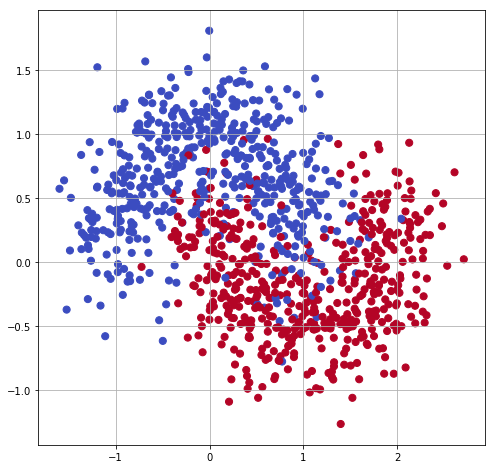

In [16]:
#Data 
data3=pd.read_csv('dataset3.csv')
X=data3.iloc[:,:2]
Y=data3.iloc[:,2]
plt.grid()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

#Generate training(X_train, Y_train) and testing data(X_test,Y_test) sets from Data(X,Y) for out of sample test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=1)

#Generate validation(X_vali, Y_vali) and testing data(X_train_1,Y_train_1) sets from training data(X_train,Y_train)
#for training arguments(degree and C)
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(
    X_train, Y_train, test_size=0.33, random_state=99)

### Solutions

(1)

C:\Users\olive\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


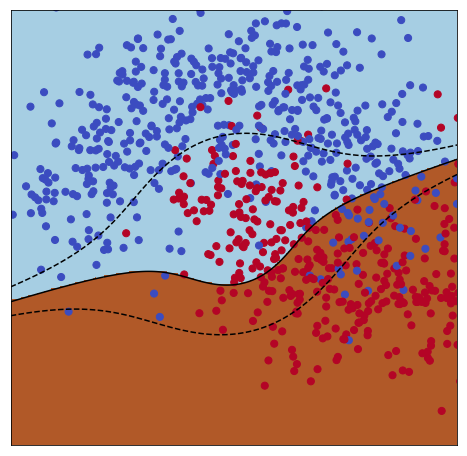

In [17]:
from sklearn import svm
clf = svm.SVC(kernel='poly') 
clf.fit(X_train,Y_train)



plt.axis('tight')
x_min = -1.5
x_max = 1.5
y_min = -1.5
y_max = 1.5

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # all the points in the plane
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]) # put them in the desion function

# Put the result into a color plot
Z = Z.reshape(XX.shape)

plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired) # Make a color for all the points in plane by our decision function.

plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-.5, 0, .5])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));
plt.show()

In [18]:
in_sample_score = clf.score(X_train,Y_train)
out_sample_score = clf.score(X_test,Y_test)
print("In-sample score is {a},while out-of sample score is {b}".format(a = in_sample_score, b =out_sample_score))

In-sample score is 0.8134328358208955,while out-of sample score is 0.8272727272727273


(2)
a.

#### Look carefully at the plot. Here the accuracy goes down when we increase log(C). If you choose optimal C in the end of the period when C reaches max as we did in class, you could have problems (might not, no garuantee). So you might have your own way of picking the optimal C, but you should have a similar OS result in next question. 

**I prefer to use `Cross validation` here and I think this is a better method to pick `degree` and `C`**

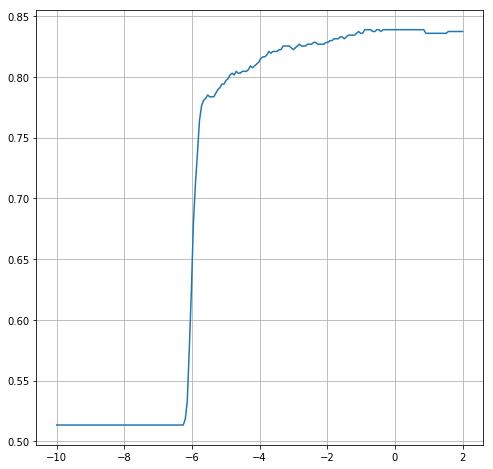

In [19]:
score = []
degree =1
C=[math.exp(i) for i in np.linspace(-10,2*degree,200)]
for c in C:
    clf = svm.SVC(kernel='poly',C=c,degree = degree,gamma = 'auto')
    score_temp = cross_val_score(clf, X_train, Y_train, cv=5, scoring="accuracy").mean()
    score.append(score_temp)
score = np.array(score)

_ = plt.plot(np.log(C),score)
_ = plt.grid()

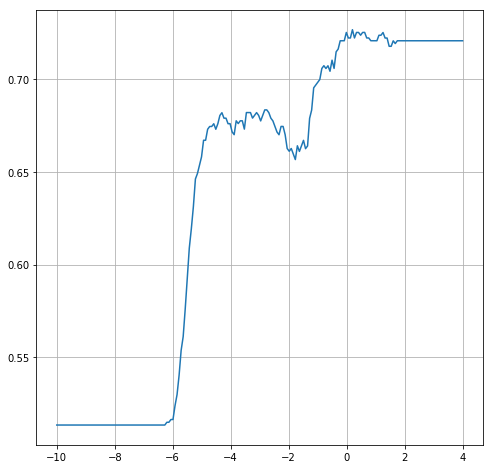

In [20]:
score = []
degree =2
C=[math.exp(i) for i in np.linspace(-10,2*degree,200)]
for c in C:
    clf = svm.SVC(kernel='poly',C=c,degree = degree,gamma = 'auto')
    score_temp = cross_val_score(clf, X_train, Y_train, cv=5, scoring="accuracy").mean()
    score.append(score_temp)
score = np.array(score)

_ = plt.plot(np.log(C),score)
_ = plt.grid()

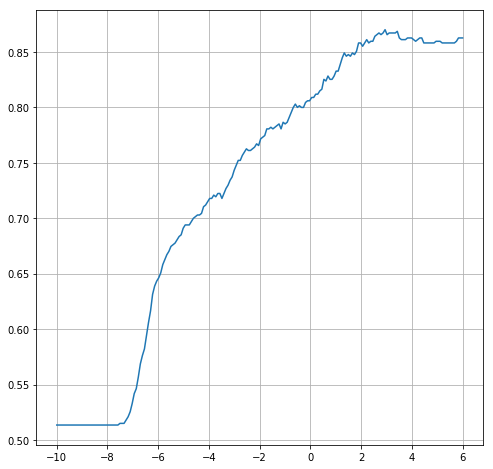

In [21]:
score = []
degree =3
C=[math.exp(i) for i in np.linspace(-10,2*degree,200)]
for c in C:
    clf = svm.SVC(kernel='poly',C=c,degree = degree,gamma = 'auto')
    score_temp = cross_val_score(clf, X_train, Y_train, cv=5, scoring="accuracy").mean()
    score.append(score_temp)
score = np.array(score)

_ = plt.plot(np.log(C),score)
_ = plt.grid()

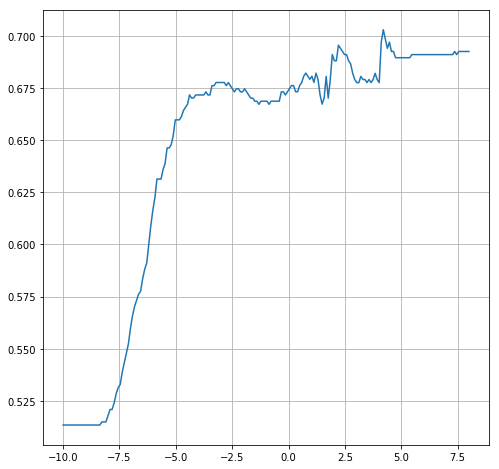

In [22]:
score = []
degree =4
C=[math.exp(i) for i in np.linspace(-10,2*degree,200)]
for c in C:
    clf = svm.SVC(kernel='poly',C=c,degree = degree,gamma = 'auto')
    score_temp = cross_val_score(clf, X_train, Y_train, cv=5, scoring="accuracy").mean()
    score.append(score_temp)
score = np.array(score)

_ = plt.plot(np.log(C),score)
_ = plt.grid()

When degree equals to 3, the accuracy is larger than any other dergrees. And let's just choose C = exp(2), since after that, the margin is small.

(3)

In [23]:
clf = svm.SVC(kernel='poly',C=math.exp(2),degree = 3,gamma = 'auto')
clf.fit(X_train,Y_train)
in_sample_score = clf.score(X_train,Y_train)
out_sample_score = clf.score(X_test,Y_test)
print("In-sample score is {a},while out-of sample score is {b}".format(a = in_sample_score, b =out_sample_score))

In-sample score is 0.8626865671641791,while out-of sample score is 0.8787878787878788
